In [2]:
#task 1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('heart.csv') # dataset provided

Saving heart.csv to heart (1).csv


In [5]:
#before cleaning i must know the data types, missing values, num of rows/columns


print("Shape (rows, cols):", df.shape)
display(df.head(10))
display(df.tail(5))

Shape (rows, cols): (303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [6]:
df.info()
#number of rows/colums

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.describe(include="all").T
#data types


,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [8]:
#missing values
# Missing values count per column
missing = df.isna().sum().sort_values(ascending=False)
missing[missing > 0]

,0


In [9]:
#remove duplicates
before = len(df)
df = df.drop_duplicates()
after = len(df)

print(f"Removed {before - after} duplicate rows.")

Removed 1 duplicate rows.


In [10]:
# Confirm no missing values
df.isna().sum().sort_values(ascending=False).head(10)

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [15]:
#save the cleaned data set for tuleap
cleaned_data = "heart_cleaned.csv"
df.to_csv(cleaned_data, index=False)

files.download(cleaned_data)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#task 2
#defining different colums since they have different types of data
categorical_cols = ["sex","cp","fbs","restecg","exang","slope","ca","thal","target"]
continuous_cols  = ["age","trestbps","chol","thalach","oldpeak"]

df[categorical_cols].nunique()

,0
sex,2
cp,4
fbs,2
restecg,3
exang,2
slope,3
ca,5
thal,4
target,2


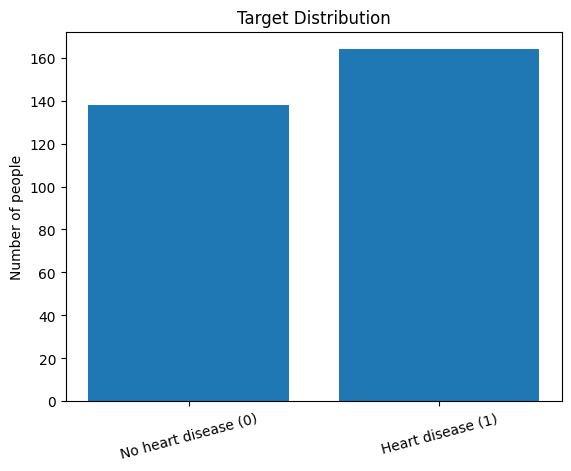

target
0    45.7
1    54.3
Name: count, dtype: float64 %


In [11]:
#plot 1 target distrubution ( bar chart)
counts = df["target"].value_counts().sort_index()
labels = ["No heart disease (0)", "Heart disease (1)"]

plt.figure()
plt.bar(labels, counts.values)
plt.title("Target Distribution")
plt.ylabel("Number of people")
plt.xticks(rotation=15)
plt.show()

#show percentages
print((counts / counts.sum() * 100).round(1), "%")

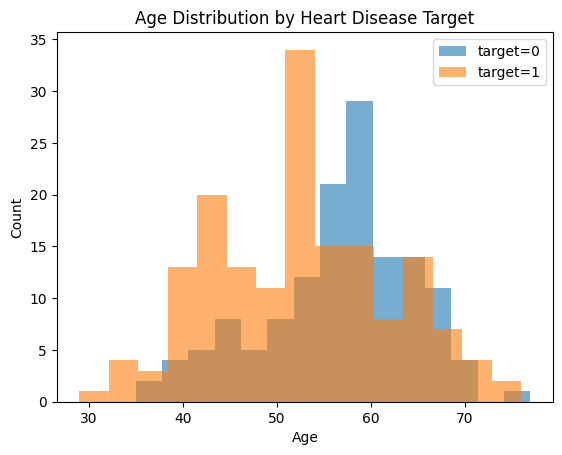

In [ ]:
#Age distribution by target (histograms)
plt.figure()
plt.hist(df[df["target"]==0]["age"], bins=15, alpha=0.6, label="target=0")
plt.hist(df[df["target"]==1]["age"], bins=15, alpha=0.6, label="target=1")
plt.title("Age Distribution by Heart Disease Target")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend()
plt.show()

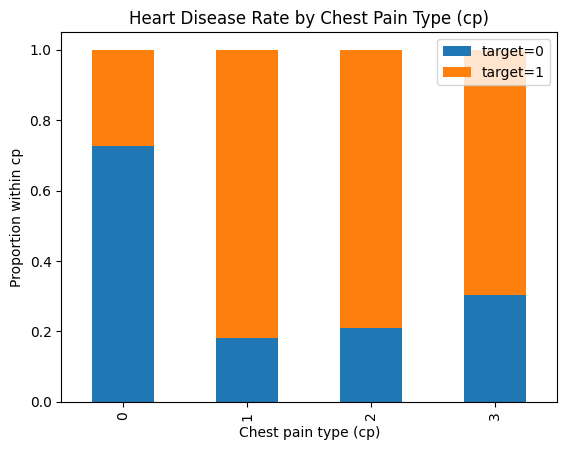

In [ ]:
#Chest pain type vs target (stacked bar)
cp_target = pd.crosstab(df["cp"], df["target"], normalize="index")  # row %s
cp_target.plot(kind="bar", stacked=True)
plt.title("Heart Disease Rate by Chest Pain Type (cp)")
plt.xlabel("Chest pain type (cp)")
plt.ylabel("Proportion within cp")
plt.legend(["target=0", "target=1"])
plt.show()

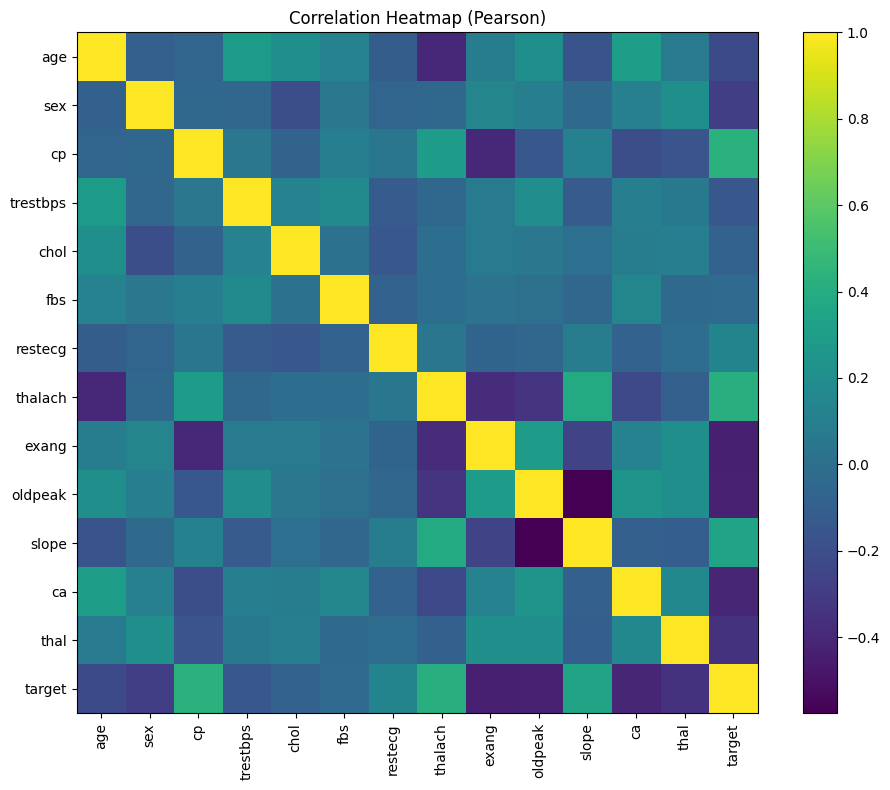

Correlation with target:
 target      1.000000
cp          0.432080
thalach     0.419955
slope       0.343940
restecg     0.134874
fbs        -0.026826
chol       -0.081437
trestbps   -0.146269
age        -0.221476
sex        -0.283609
thal       -0.343101
ca         -0.408992
oldpeak    -0.429146
exang      -0.435601
Name: target, dtype: float64


In [ ]:
#Correlation matrix / heatmap
corr = df.corr(numeric_only=True)

plt.figure(figsize=(10,8))
plt.imshow(corr, interpolation="nearest")
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Correlation Heatmap (Pearson)")
plt.tight_layout()
plt.show()

# Correlation with target (most useful)
corr_with_target = corr["target"].sort_values(ascending=False)
print("Correlation with target:\n", corr_with_target)

In [ ]:
# Compare average values between target groups
summary = df.groupby("target")[continuous_cols].mean().round(2)
display(summary)

# Also show medians (more robust if skewed)
summary_med = df.groupby("target")[continuous_cols].median().round(2)
display(summary_med)

,age,trestbps,chol,thalach,oldpeak
target,,,,,
0,56.60,134.40,251.09,139.10,1.59
1,52.59,129.25,242.64,158.38,0.59


,age,trestbps,chol,thalach,oldpeak
target,,,,,
0,58.0,130.0,249.0,142.0,1.4
1,52.0,130.0,234.5,161.0,0.2


In [17]:
#task 3
#group the heart disease rate by the key categorical varaibles
def target_rate_by(col):
    out = df.groupby(col)["target"].mean().sort_values(ascending=False)
    return (out * 100).round(1)  # as %

for col in ["sex", "cp", "exang", "thal", "slope", "ca", "fbs", "restecg"]:
    if col in df.columns:
        print(f"\nHeart disease rate (%) by {col}:")
        display(target_rate_by(col))


Heart disease rate (%) by sex:


,target
sex,
0,75.0
1,44.7



Heart disease rate (%) by cp:


,target
cp,
1,82.0
2,79.1
3,69.6
0,27.3



Heart disease rate (%) by exang:


,target
exang,
0,69.5
1,23.2



Heart disease rate (%) by thal:


,target
thal,
2,78.2
0,50.0
1,33.3
3,23.9



Heart disease rate (%) by slope:


,target
slope,
2,75.2
0,42.9
1,35.0



Heart disease rate (%) by ca:


,target
ca,
4,75.0
0,74.3
1,32.3
2,18.4
3,15.0



Heart disease rate (%) by fbs:


,target
fbs,
0,54.9
1,51.1



Heart disease rate (%) by restecg:


,target
restecg,
1,62.9
0,46.3
2,25.0


In [18]:
#comparing the avergaes by the target
continuous_cols = ["age","trestbps","chol","thalach","oldpeak"]

mean_by_target = df.groupby("target")[continuous_cols].mean().round(2)
median_by_target = df.groupby("target")[continuous_cols].median().round(2)

print("Mean by target:")
display(mean_by_target)

print("Median by target:")
display(median_by_target)

Mean by target:


,age,trestbps,chol,thalach,oldpeak
target,,,,,
0,56.60,134.40,251.09,139.10,1.59
1,52.59,129.25,242.64,158.38,0.59


Median by target:


,age,trestbps,chol,thalach,oldpeak
target,,,,,
0,58.0,130.0,249.0,142.0,1.4
1,52.0,130.0,234.5,161.0,0.2


In [22]:
#grouping the ages since models benefit when variables are looked ing group form, and it is easier to read
df["age_group"] = pd.cut(
    df["age"],
    bins=[0, 39, 49, 59, 69, 120],
    labels=["<40","40-49","50-59","60-69","70+"]
)

age_group_rate = (df.groupby("age_group")["target"].mean() * 100).round(1)
print("Heart disease rate (%) by age group:")
display(age_group_rate)

Heart disease rate (%) by age group:


/tmp/ipython-input-1192520610.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_rate = (df.groupby("age_group")["target"].mean() * 100).round(1)


,target
age_group,
<40,73.3
40-49,69.4
50-59,52.0
60-69,40.0
70+,60.0


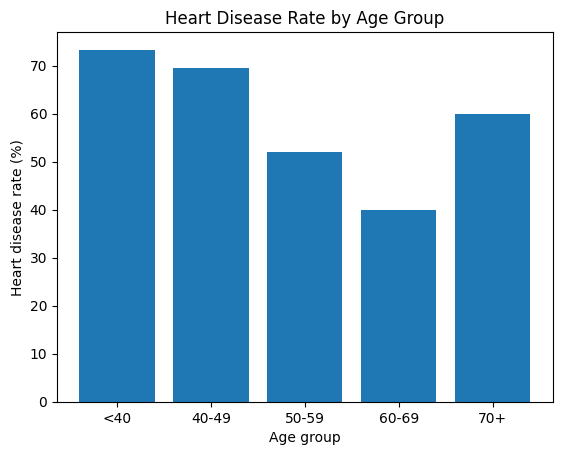

In [24]:
#age group vs target rate
plt.figure()
plt.bar(age_group_rate.index.astype(str), age_group_rate.values)
plt.title("Heart Disease Rate by Age Group")
plt.xlabel("Age group")
plt.ylabel("Heart disease rate (%)")
plt.show()

In [26]:
#for model this is buidling x (features) and y(target)
from sklearn.model_selection import train_test_split

target_col = "target"

X = df.drop(columns=[target_col, "age_group"])
y = df[target_col]

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (302, 13)
y shape: (302,)


In [27]:
#splitting into traning/validation/testing into a ratio of 60/20/20
# 1) Train+Val vs Test (80/20)
X_trainval, X_test, y_trainval, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

# 2) Train vs Val (from the 80% chunk -> 75/25 gives 60/20 overall)
X_train, X_val, y_train, y_val = train_test_split(
    X_trainval, y_trainval, test_size=0.25, random_state=42, stratify=y_trainval
)

print("Train:", X_train.shape, y_train.shape)
print("Val:  ", X_val.shape, y_val.shape)
print("Test: ", X_test.shape, y_test.shape)

print("\nTarget rates:")
print("Train:", y_train.mean().round(3), "Val:", y_val.mean().round(3), "Test:", y_test.mean().round(3))

Train: (180, 13) (180,)
Val:   (61, 13) (61,)
Test:  (61, 13) (61,)

Target rates:
Train: 0.544 Val: 0.541 Test: 0.541


In [28]:
#saving the splits for collobration
train_df = X_train.copy()
train_df["target"] = y_train.values

val_df = X_val.copy()
val_df["target"] = y_val.values

test_df = X_test.copy()
test_df["target"] = y_test.values

train_df.to_csv("train.csv", index=False)
val_df.to_csv("val.csv", index=False)
test_df.to_csv("test.csv", index=False)

print("Saved train.csv, val.csv, test.csv")

Saved train.csv, val.csv, test.csv


In [33]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [35]:
#Logistic Regression / SVM / KNN all behave better when features are on similar scales.
models = {
    "Logistic Regression": Pipeline([
        ("scaler", StandardScaler()),
        ("model", LogisticRegression(max_iter=2000, random_state=42))
    ]),
    "SVM (RBF)": Pipeline([
        ("scaler", StandardScaler()),
        ("model", SVC(kernel="rbf", random_state=42))
    ]),
    "KNN": Pipeline([
        ("scaler", StandardScaler()),
        ("model", KNeighborsClassifier(n_neighbors=5))
    ])
}

In [36]:
#ranking models based on accuracy
results = []

for name, pipe in models.items():
    pipe.fit(X_train, y_train)
    preds = pipe.predict(X_val)
    acc = accuracy_score(y_val, preds)
    results.append((name, acc))

results_df = pd.DataFrame(results, columns=["Model", "Validation Accuracy"]).sort_values(
    "Validation Accuracy", ascending=False
)
display(results_df)

,Model,Validation Accuracy
0,Logistic Regression,0.819672
2,KNN,0.770492
1,SVM (RBF),0.754098


In [37]:
# finding the best model based on detailed metrics
#since accuracy could hide problems such as one class being predicted poorly
best_model_name = results_df.iloc[0]["Model"]
best_pipe = models[best_model_name]

print("Best model based on validation accuracy:", best_model_name)

val_preds = best_pipe.predict(X_val)

print("\nConfusion matrix (val):\n", confusion_matrix(y_val, val_preds))
print("\nClassification report (val):\n", classification_report(y_val, val_preds))

Best model based on validation accuracy: Logistic Regression

Confusion matrix (val):
 [[22  6]
 [ 5 28]]

Classification report (val):
               precision    recall  f1-score   support

           0       0.81      0.79      0.80        28
           1       0.82      0.85      0.84        33

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



	•	precision: when model predicts class 1, how often it’s right
	•	recall: how many actual class 1 cases it catches
	•	f1-score: balance of precision + recall

In [44]:
#rebuilding the logitsitc regresson and getting a baseline score
#This helps me with strucuring the model since this is the new starting place
baseline_lr = Pipeline([
    ("scaler", StandardScaler()),
    ("model", LogisticRegression(max_iter=2000, random_state=42))
])

baseline_lr.fit(X_train, y_train)
val_preds = baseline_lr.predict(X_val)

print("Baseline val accuracy:", accuracy_score(y_val, val_preds))
print("Confusion matrix (val):\n", confusion_matrix(y_val, val_preds))
print("Classification report (val):\n", classification_report(y_val, val_preds))

Baseline val accuracy: 0.819672131147541
Confusion matrix (val):
 [[22  6]
 [ 5 28]]
Classification report (val):
               precision    recall  f1-score   support

           0       0.81      0.79      0.80        28
           1       0.82      0.85      0.84        33

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



In [47]:
#finding out what varibales matter
# pull coefficients
coefs = baseline_lr.named_steps["model"].coef_[0]
features = X_train.columns

importance = pd.DataFrame({
    "feature": features,
    "coef": coefs,
    "abs_coef": np.abs(coefs)
}).sort_values("abs_coef", ascending=False)

display(importance.head(15))

,feature,coef,abs_coef
2,cp,0.980648,0.980648
1,sex,-0.916865,0.916865
7,thalach,0.680513,0.680513
8,exang,-0.638176,0.638176
4,chol,-0.630725,0.630725
9,oldpeak,-0.585153,0.585153
12,thal,-0.552288,0.552288
6,restecg,0.375876,0.375876
10,slope,0.369348,0.369348
11,ca,-0.307305,0.307305



*   The bigger the abs_coef the more infleunce the feature has ( for this model)

*  positive coefs pushes the prediction towards target = 1 ( having heart disease).


*  negative coefs(pushes towards target = 0 ( not having heart disease)




In [49]:
#testing by only traning the top N features and seeing if validation approves
# since removing "noisy" features will imrpove the
from sklearn.base import clone

def evaluate_with_top_n(n):
    top_features = importance["feature"].head(n).tolist()
    lr = clone(baseline_lr)
    lr.fit(X_train[top_features], y_train)
    preds = lr.predict(X_val[top_features])
    return n, accuracy_score(y_val, preds)

scores = [evaluate_with_top_n(n) for n in [5, 7, 9, 11, 13]]
scores_df = pd.DataFrame(scores, columns=["Top N features", "Val Accuracy"]).sort_values("Val Accuracy", ascending=False)
display(scores_df)

,Top N features,Val Accuracy
4,13,0.819672
3,11,0.803279
2,9,0.754098
1,7,0.754098
0,5,0.672131


In [54]:
#tuning the logistic model
#using grid search to find its best parameters
from sklearn.model_selection import GridSearchCV

pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("model", LogisticRegression(max_iter=5000, random_state=42))
])

param_grid = {
    "model__C": [0.001,0.01, 0.1, 1, 10, 100],
    "model__penalty": ["l2"],
    "model__solver": ["lbfgs"]
}

grid = GridSearchCV(
    pipe,
    param_grid=param_grid,
    scoring="accuracy",
    cv=5,
    n_jobs=-1
)

grid.fit(X_train, y_train)

print("Best CV accuracy:", grid.best_score_)
print("Best params:", grid.best_params_)
best_lr = grid.best_estimator_

Best CV accuracy: 0.8388888888888889
Best params: {'model__C': 0.01, 'model__penalty': 'l2', 'model__solver': 'lbfgs'}


*   grid search tries lots of differnet setting
*   cv = 5 means it is checking peformance across 5 folds for stability reasons

*  best score is the best cross-validated traning performance ( 0.8389)


In [59]:
#validating the tuned model ( on the validation set)
tuned_val_preds = best_lr.predict(X_val)

print("Tuned val accuracy:", accuracy_score(y_val, tuned_val_preds))
print("Confusion matrix (val):\n", confusion_matrix(y_val, tuned_val_preds))
print("Classification report (val):\n", classification_report(y_val, tuned_val_preds))

Tuned val accuracy: 0.7704918032786885
Confusion matrix (val):
 [[19  9]
 [ 5 28]]
Classification report (val):
               precision    recall  f1-score   support

           0       0.79      0.68      0.73        28
           1       0.76      0.85      0.80        33

    accuracy                           0.77        61
   macro avg       0.77      0.76      0.77        61
weighted avg       0.77      0.77      0.77        61



the accurancy has actually gotten worse, therefore the tuned model is has made the model worse

In [60]:
test_preds = best_lr.predict(X_test)

print("FINAL test accuracy:", accuracy_score(y_test, test_preds))
print("Confusion matrix (test):\n", confusion_matrix(y_test, test_preds))
print("Classification report (test):\n", classification_report(y_test, test_preds))

FINAL test accuracy: 0.7868852459016393
Confusion matrix (test):
 [[18 10]
 [ 3 30]]
Classification report (test):
               precision    recall  f1-score   support

           0       0.86      0.64      0.73        28
           1       0.75      0.91      0.82        33

    accuracy                           0.79        61
   macro avg       0.80      0.78      0.78        61
weighted avg       0.80      0.79      0.78        61



the confusion matrix:
*   TN (0 correctly predicted): 18
*   FP (predicted disease but actually 0): 10
*   FN (missed disease): 3
*   TP (1 correctly predicted): 30

class 1 performance
*   Recall = 0.91 → it correctly catches 91% of heart-disease cases (30 out of 33)
*   Precision = 0.75 → when it predicts disease, it’s right 75% of the time



In [62]:
#since the baseline model was actually better i will use that as the final model

# Fit baseline on training data
baseline_lr.fit(X_train, y_train)

# Evaluate baseline on test data
base_test_preds = baseline_lr.predict(X_test)

print("BASELINE test accuracy:", accuracy_score(y_test, base_test_preds))
print("Confusion matrix (test):\n", confusion_matrix(y_test, base_test_preds))
print("Classification report (test):\n", classification_report(y_test, base_test_preds))


BASELINE test accuracy: 0.7540983606557377
Confusion matrix (test):
 [[19  9]
 [ 6 27]]
Classification report (test):
               precision    recall  f1-score   support

           0       0.76      0.68      0.72        28
           1       0.75      0.82      0.78        33

    accuracy                           0.75        61
   macro avg       0.76      0.75      0.75        61
weighted avg       0.75      0.75      0.75        61



Even though the accuracy is worse on the test data, the validation accuracy was much better, therefore  will still use that model.

The drop in accuracy from valiation to test may be becuase of the small dataset we was given